In [1]:
options(warn=-1)

In [34]:
library(ISLR)

# Principal Components Analysis

In [5]:
pr.out = prcomp(USArrests, scale = TRUE)

pr.out$center
pr.out$scale
pr.out$rotation

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


In [7]:
pr.out$rotation = -pr.out$rotation
pr.out$x = -pr.out$x

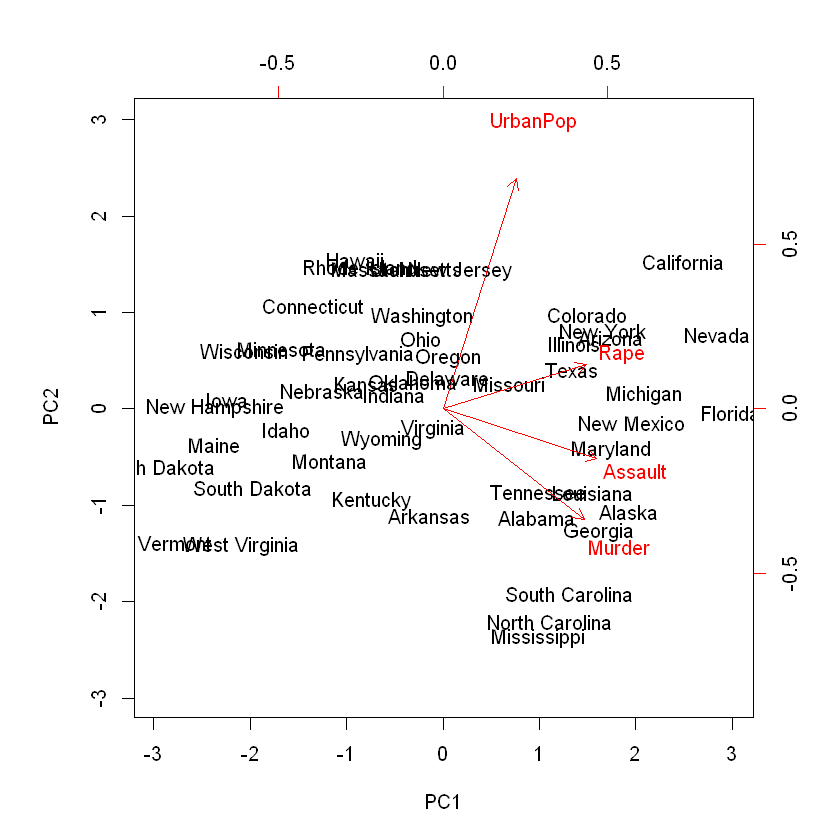

In [8]:
biplot(pr.out, scale = 0)

In [9]:
pr.out$sdev
pr.var = pr.out$sdev ^ 2
pr.var

[1] 1.5748783 0.9948694 0.5971291 0.4164494

[1] 2.4802416 0.9897652 0.3565632 0.1734301

In [10]:
pve = pr.var / sum(pr.var)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

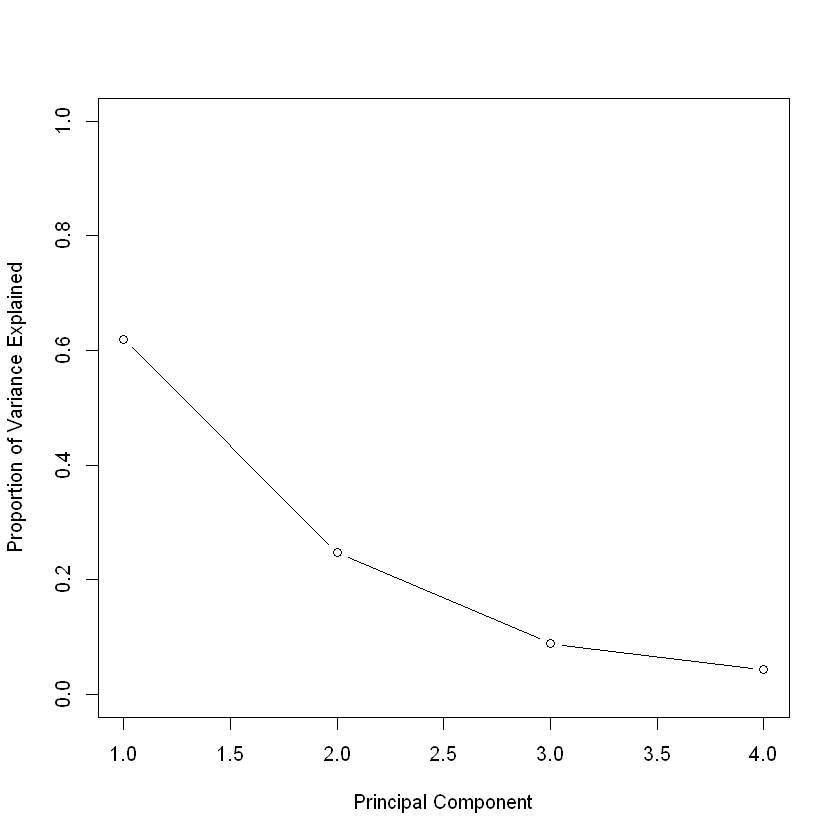

In [12]:
plot(pve, xlab = 'Principal Component', ylab = 'Proportion of Variance Explained', ylim = c(0, 1), type = 'b')

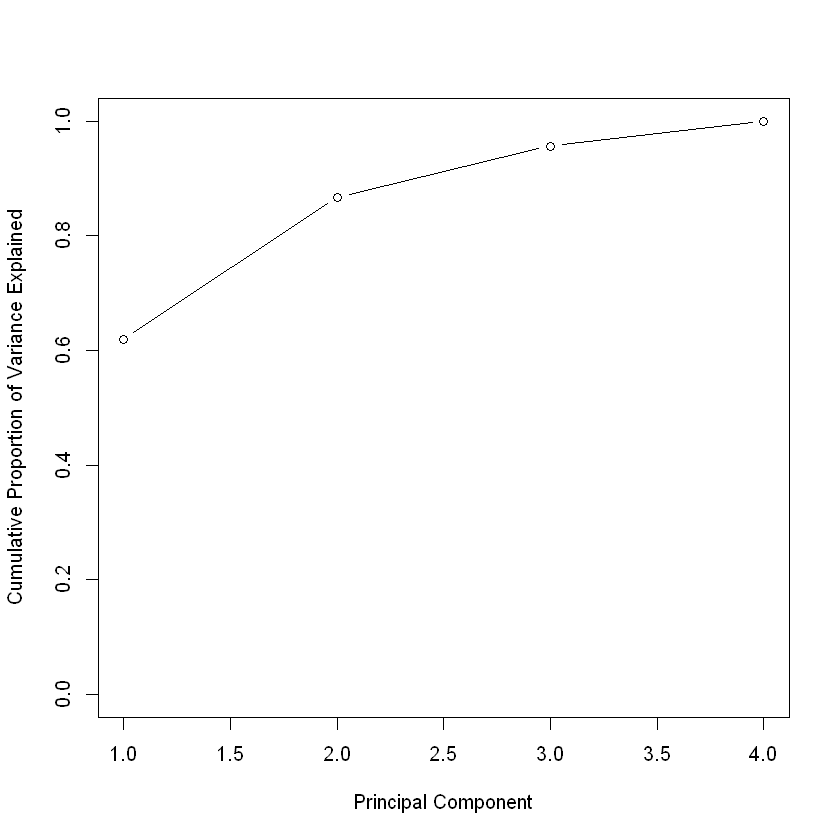

In [14]:
plot(cumsum(pve), xlab = 'Principal Component', ylab = 'Cumulative Proportion of Variance Explained', 
     ylim = c(0, 1), type = 'b')

# K-Means Clustering

In [15]:
set.seed(1)
x = matrix(rnorm(50 * 2), ncol = 2)
x[1:25, 1] = x[1:25, 1] + 3
x[1:25, 2] = x[1:25, 2] - 4

In [16]:
km.out = kmeans(x, 2, nstart = 20)
km.out$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

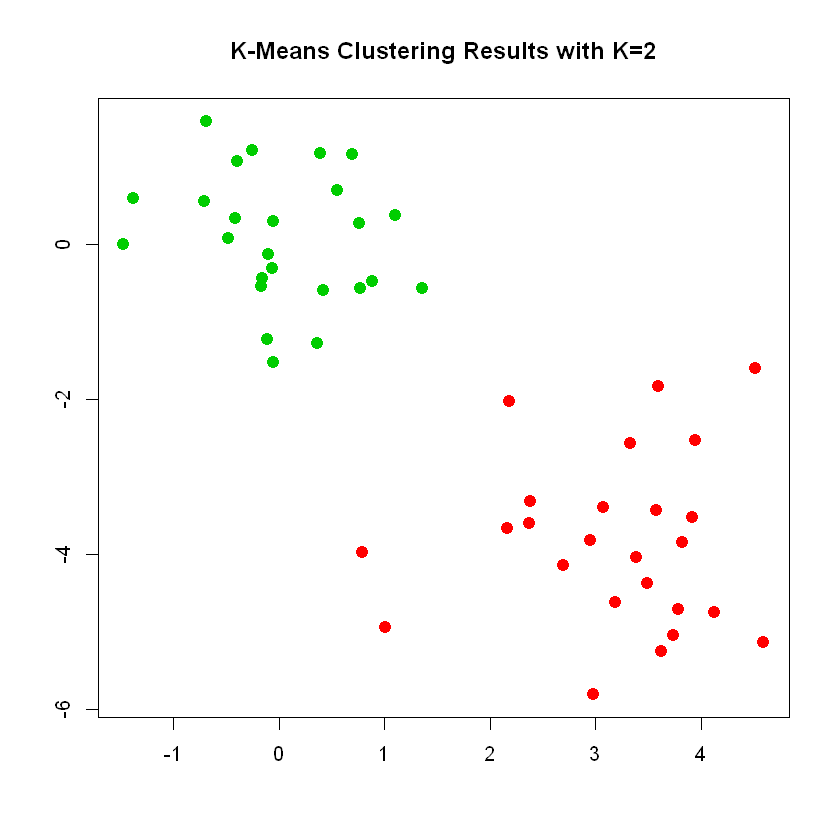

In [17]:
plot(x, col = km.out$cluster + 1, main = 'K-Means Clustering Results with K=2', xlab = '', ylab = '', pch = 20, cex = 2)

In [18]:
set.seed(1)
km.out = kmeans(x, 3, nstart = 20)
km.out

K-means clustering with 3 clusters of sizes 5, 25, 20

Cluster means:
        [,1]        [,2]
1 3.51171162 -2.10935842
2 0.03223135  0.06924384
3 3.08290361 -4.26589906

Clustering vector:
 [1] 3 3 3 3 1 1 3 3 3 3 1 3 3 3 3 3 3 1 3 1 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

Within cluster sum of squares by cluster:
[1]  3.740301 28.534174 27.901401
 (between_SS / total_SS =  84.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [22]:
set.seed(10)

km.out = kmeans(x, 3, nstart = 1)
km.out$tot.withinss

[1] 60.37249

In [23]:
set.seed(10)

km.out = kmeans(x, 3, nstart = 20)
km.out$tot.withinss

[1] 60.17588

# Hierarchical Clustering

In [24]:
set.seed(1)
x = matrix(rnorm(50 * 2), ncol = 2)
x[1:25, 1] = x[1:25, 1] + 3
x[1:25, 2] = x[1:25, 2] - 4

In [25]:
hc.complete = hclust(dist(x), method = 'complete')
hc.average = hclust(dist(x), method = 'average')
hc.single = hclust(dist(x), method = 'single')

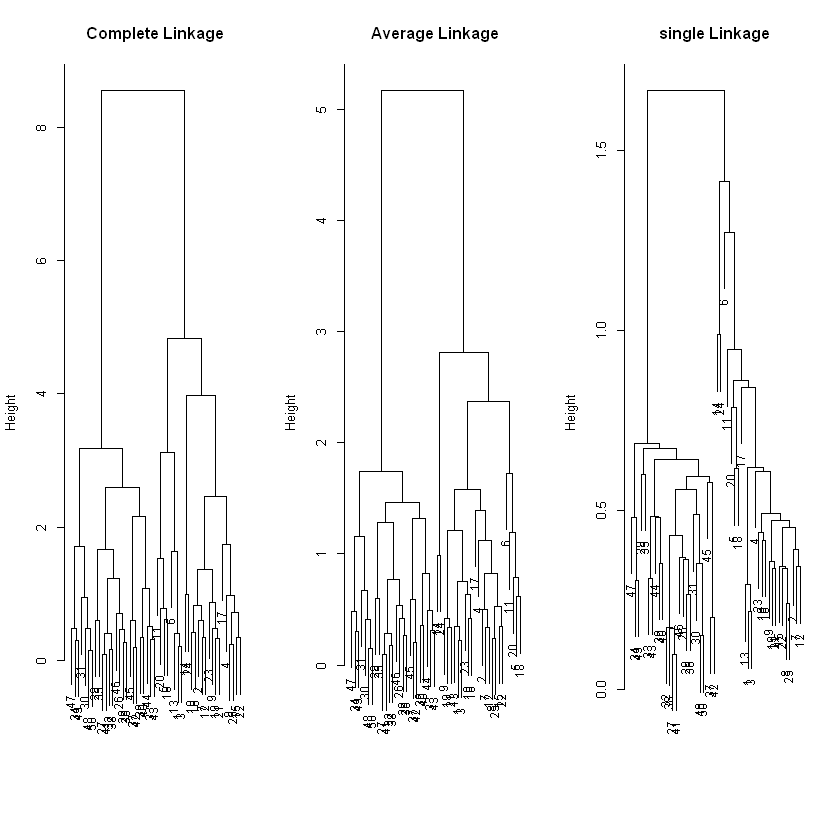

In [26]:
par(mfrow = c(1, 3))

plot(hc.complete, main = 'Complete Linkage', xlab = '', sub = '', cex = .9)
plot(hc.average, main = 'Average Linkage', xlab = '', sub = '', cex = .9)
plot(hc.single, main = 'single Linkage', xlab = '', sub = '', cex = .9)

In [29]:
cutree(hc.complete, 2)
cutree(hc.average, 2)
cutree(hc.single, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [30]:
xsc = scale(x)

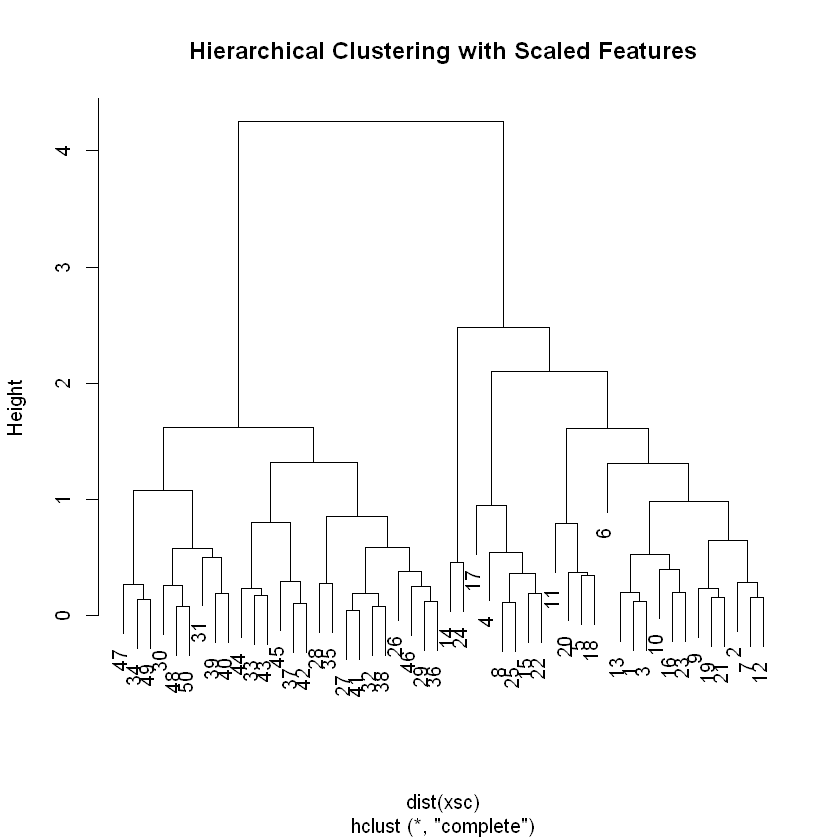

In [31]:
plot(hclust(dist(xsc), method = 'complete'), main = 'Hierarchical Clustering with Scaled Features')

In [32]:
x = matrix(rnorm(30 * 3), ncol = 3)
dd = as.dist(1 - cor(t(x)))

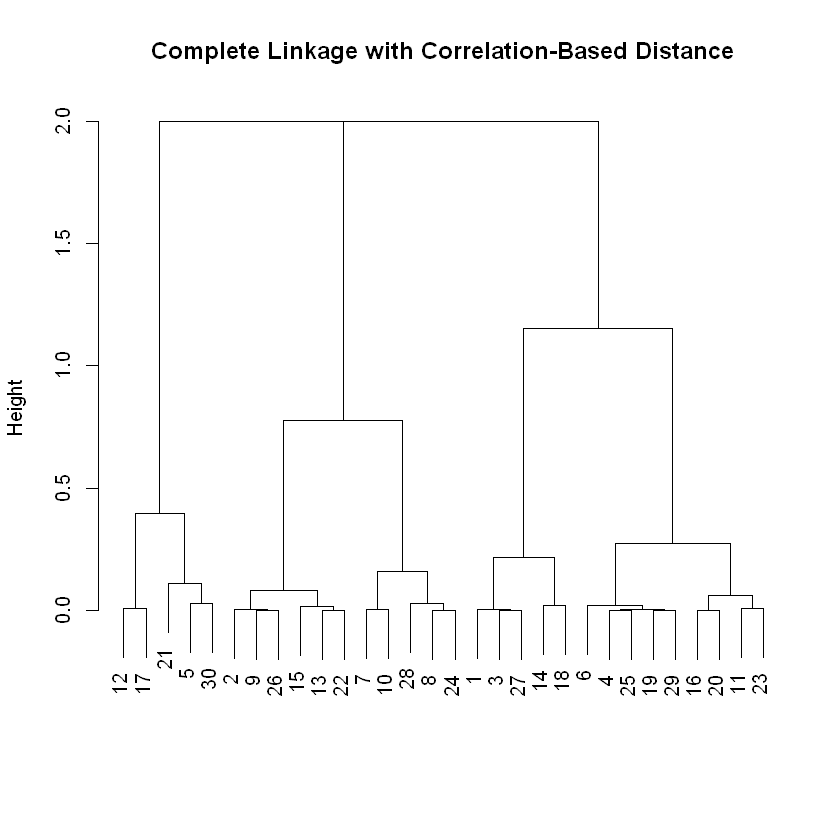

In [33]:
plot(hclust(dd, method = 'complete'), main = 'Complete Linkage with Correlation-Based Distance', xlab = '', sub = '')

# PCA on the NCI60 Data

In [35]:
nci.labs = NCI60$labs
nci.data = NCI60$data

In [36]:
table(nci.labs)

nci.labs
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 

In [37]:
pr.out = prcomp(nci.data, scale = TRUE)

In [38]:
Cols = function(vec) {
  cols = rainbow(length(unique(vec)))
  return(cols[as.numeric(as.factor(vec))])
}

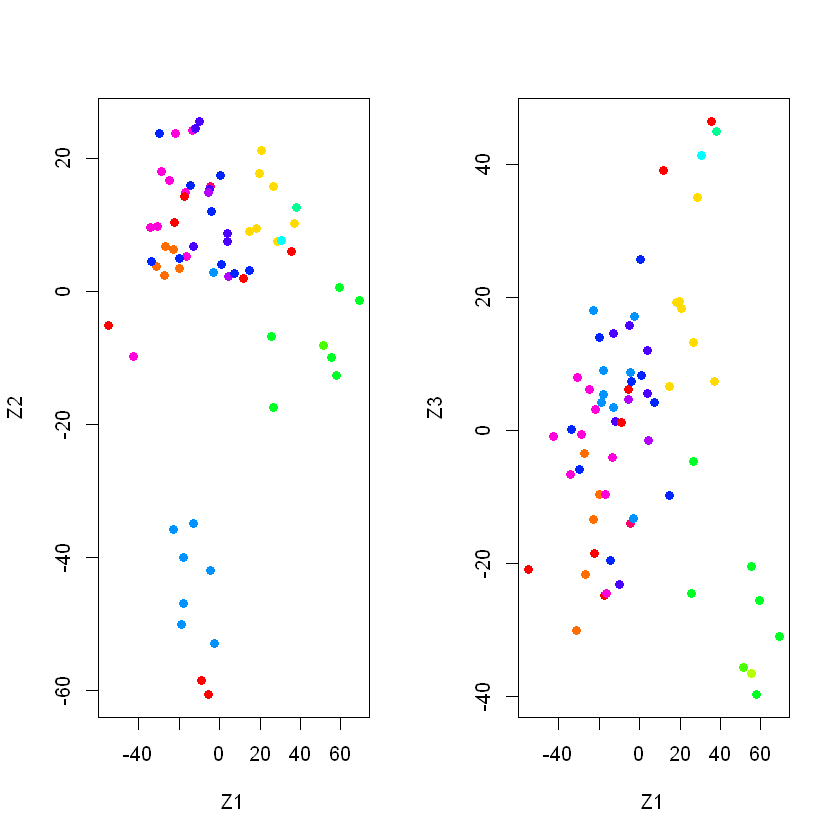

In [39]:
par(mfrow = c(1, 2))

plot(pr.out$x[, 1:2], col = Cols(nci.labs), pch = 19, xlab = 'Z1', ylab = 'Z2')
plot(pr.out$x[, c(1, 3)], col = Cols(nci.labs), pch = 19, xlab = 'Z1', ylab = 'Z3')

In [40]:
summary(pr.out)

Importance of components:
                           PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     27.8535 21.48136 19.82046 17.03256 15.97181 15.72108
Proportion of Variance  0.1136  0.06756  0.05752  0.04248  0.03735  0.03619
Cumulative Proportion   0.1136  0.18115  0.23867  0.28115  0.31850  0.35468
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     14.47145 13.54427 13.14400 12.73860 12.68672 12.15769
Proportion of Variance  0.03066  0.02686  0.02529  0.02376  0.02357  0.02164
Cumulative Proportion   0.38534  0.41220  0.43750  0.46126  0.48482  0.50646
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     11.83019 11.62554 11.43779 11.00051 10.65666 10.48880
Proportion of Variance  0.02049  0.01979  0.01915  0.01772  0.01663  0.01611
Cumulative Proportion   0.52695  0.54674  0.56590  0.58361  0.60024  0.61635
                           PC19    PC20     PC21    PC

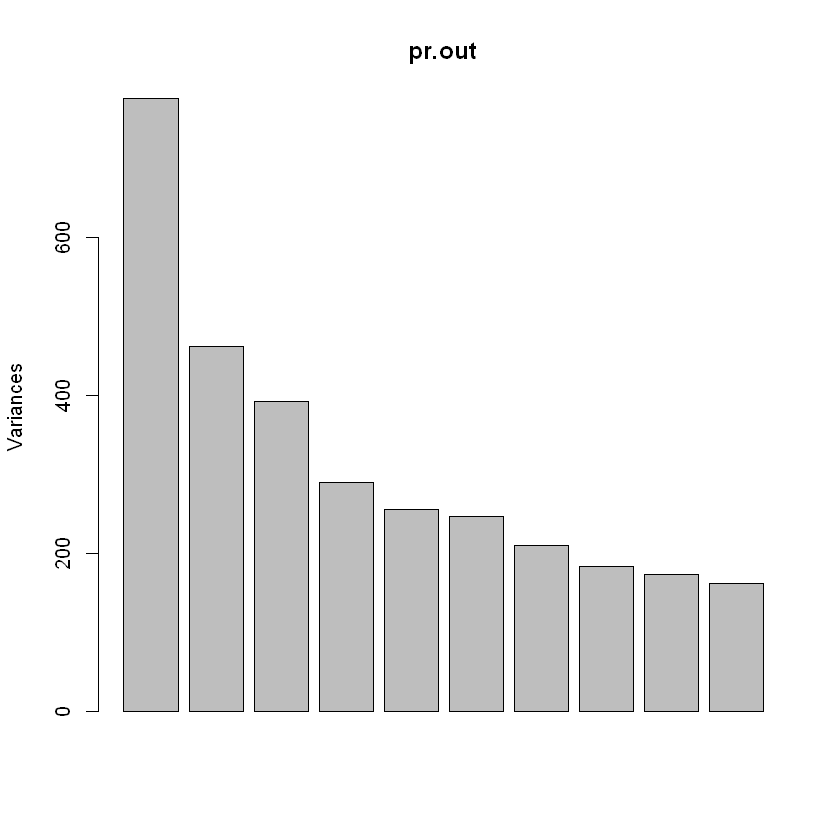

In [41]:
plot(pr.out)

In [42]:
pve = 100 * pr.out$sdev ^ 2 / sum(pr.out$sdev ^ 2)

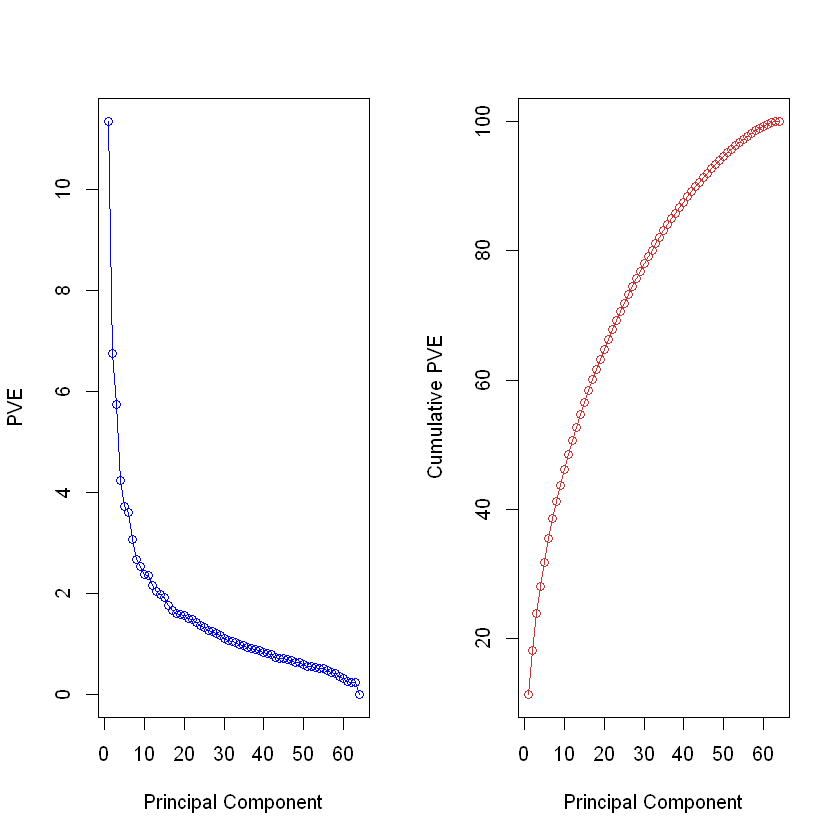

In [43]:
par(mfrow = c(1, 2))

plot(pve, type = 'o', ylab = 'PVE', xlab = 'Principal Component', col = 'blue')
plot(cumsum(pve), type = 'o', xlab = 'Principal Component', ylab = 'Cumulative PVE', col = 'brown3')

# Clustering the Observations of the NCI60 Data

In [44]:
pr.out = prcomp(nci.data, scale = TRUE)

In [45]:
sd.data = scale(nci.data)
data.dist = dist(sd.data)

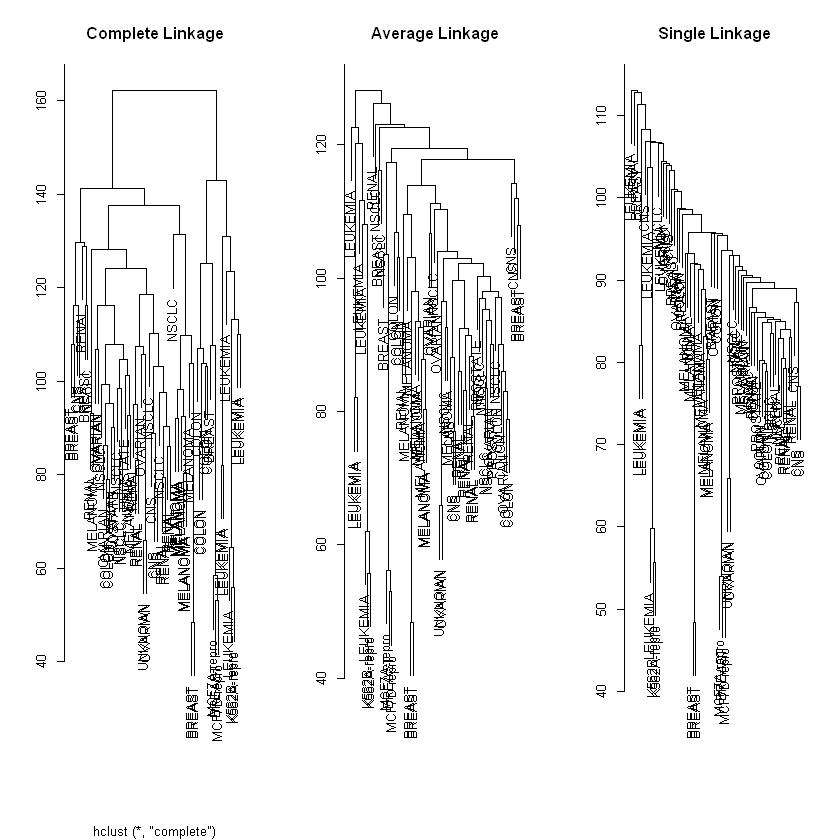

In [46]:
par(mfrow = c(1, 3))

plot(hclust(data.dist), labels = nci.labs, main = 'Complete Linkage', xlab = '', ylab = '')
plot(hclust(data.dist, method = 'average'), labels = nci.labs, main = 'Average Linkage', xlab = '', ylab = '', sub = '')
plot(hclust(data.dist, method = 'single'), labels = nci.labs, main = 'Single Linkage', xlab = '', ylab = '', sub = '')

In [47]:
hc.out = hclust(dist(sd.data))
hc.clusters = cutree(hc.out, 4)
table(hc.clusters, nci.labs)

           nci.labs
hc.clusters BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro
          1      2   3     2           0           0        0           0
          2      3   2     0           0           0        0           0
          3      0   0     0           1           1        6           0
          4      2   0     5           0           0        0           1
           nci.labs
hc.clusters MCF7D-repro MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
          1           0        8     8       6        2     8       1
          2           0        0     1       0        0     1       0
          3           0        0     0       0        0     0       0
          4           1        0     0       0        0     0       0

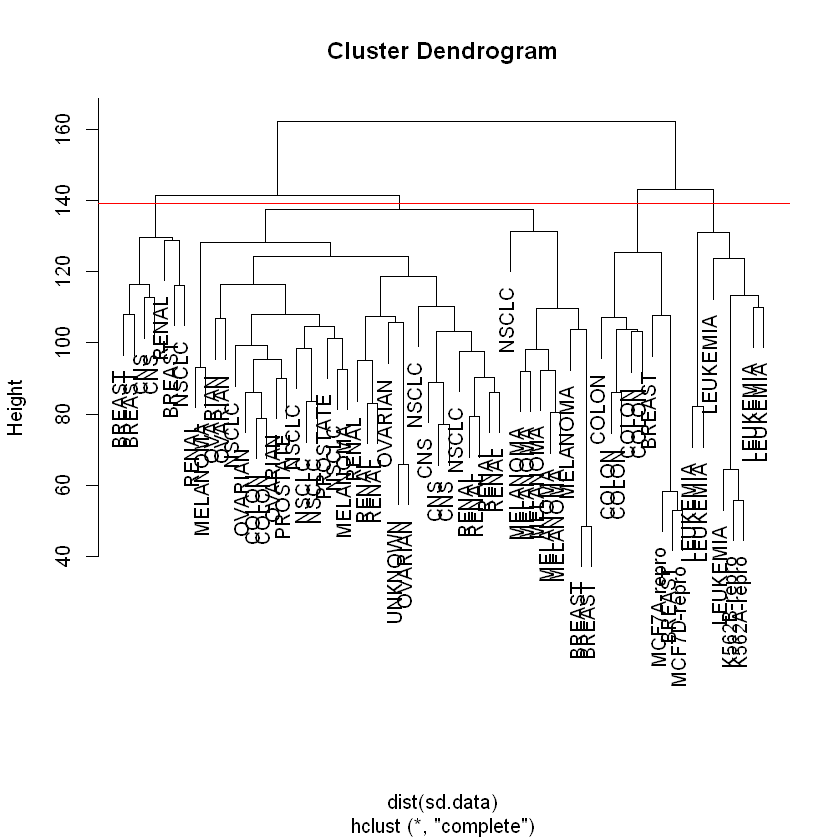

In [48]:
plot(hc.out, labels = nci.labs)
abline(h = 139, col = 'red')

In [49]:
hc.out


Call:
hclust(d = dist(sd.data))

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 64 


In [50]:
set.seed(1)

km.out = kmeans(sd.data, 4, nstart = 20)
km.clusters = km.out$cluster
table(km.clusters, hc.clusters)

           hc.clusters
km.clusters  1  2  3  4
          1  9  0  0  0
          2 20  7  0  0
          3  0  0  8  0
          4 11  0  0  9

In [51]:
hc.out = hclust(dist(pr.out$x[, 1:5]))

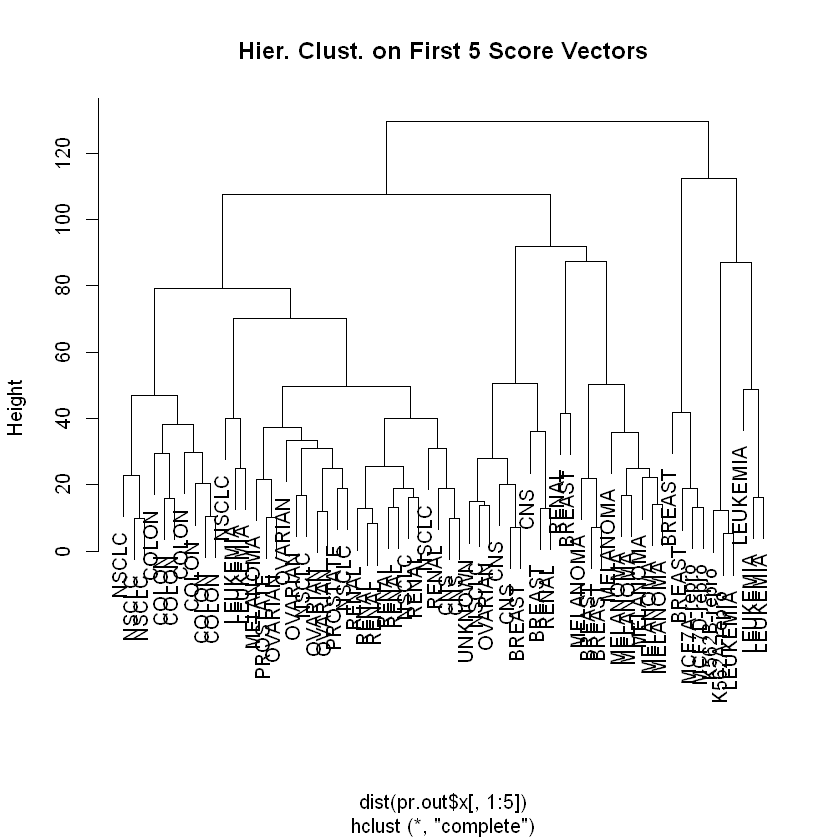

In [52]:
plot(hc.out, labels = nci.labs, main = 'Hier. Clust. on First 5 Score Vectors')

In [53]:
table(cutree(hc.out, 4), nci.labs)

   nci.labs
    BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro MCF7D-repro
  1      0   2     7           0           0        2           0           0
  2      5   3     0           0           0        0           0           0
  3      0   0     0           1           1        4           0           0
  4      2   0     0           0           0        0           1           1
   nci.labs
    MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
  1        1     8       5        2     7       0
  2        7     1       1        0     2       1
  3        0     0       0        0     0       0
  4        0     0       0        0     0       0